In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os
os.chdir("/content/drive/Shareddrives/機器學習/AOI data") #這邊輸入欲使用的資料夾路徑
os.getcwd()

'/content/drive/Shareddrives/機器學習/AOI data'

In [7]:
!pip install mahotas

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import cv2
import seaborn as sns
import mahotas
import glob
import argparse
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [9]:
train = pd.read_csv("AOI_test_check.csv")
train.head()

,ID,Label
0,test_00000.png,NaN
1,test_00001.png,NaN
2,test_00002.png,NaN
3,test_00003.png,NaN
4,test_00004.png,NaN


In [10]:
data_path = "AOI_Test_Image" #路徑掛載到存放圖片的資料夾路徑

image shape: (512, 512, 3)
data type: uint8
min: 118, max: 215


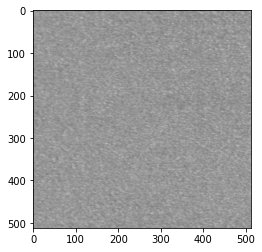

In [11]:
# 挑選一張切割前的原圖
img = cv2.imread(os.path.join(data_path, train.loc[320, "ID"]))
print(f"image shape: {img.shape}")
print(f"data type: {img.dtype}")
print(f"min: {img.min()}, max: {img.max()}")
plt.imshow(img)
plt.show()

In [12]:
# 設置切割參數
crop = []
point = [0, 171, 342, 512]
for i in range(3):
  for j in range(3):
    crop.append([point[i]]+[point[i+1]]+[point[j]]+[point[j+1]])
crop

[[0, 171, 0, 171],
 [0, 171, 171, 342],
 [0, 171, 342, 512],
 [171, 342, 0, 171],
 [171, 342, 171, 342],
 [171, 342, 342, 512],
 [342, 512, 0, 171],
 [342, 512, 171, 342],
 [342, 512, 342, 512]]

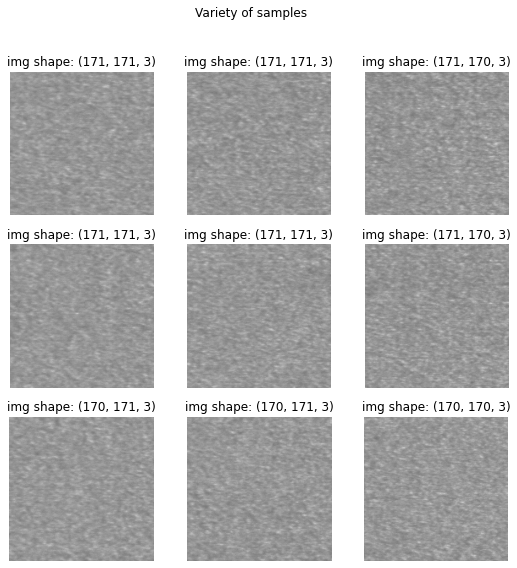

In [13]:
# 切割成3*3個子圖的效果
plt.figure(figsize=(9,9))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = cv2.imread(os.path.join(data_path, train.loc[320, "ID"]))[crop[i][0]:crop[i][1], crop[i][2]:crop[i][3]]
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.title(f"img shape: {img.shape}")
plt.suptitle(f"Variety of samples", fontsize=12)
plt.show()

In [14]:
import statistics
a=img.reshape(-1)

In [15]:
# 將3*3個子圖的特徵合併成一個dataframe
df_hara = pd.DataFrame()
for i in range(9):
  img = cv2.imread(os.path.join(data_path, train.loc[320,"ID"]))[crop[i][0]:crop[i][1], crop[i][2]:crop[i][3]]
  image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  df_hara = df_hara.append(list(mahotas.features.haralick(image)))

df_hara

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.001970,25.829412,0.839422,80.426455,0.216687,301.309563,295.876410,6.119430,9.464964,0.000488,3.471434,-0.173540,0.913495
1,0.001335,67.216228,0.582418,80.482709,0.142782,301.305363,254.714608,6.018811,10.019179,0.000305,4.127620,-0.066799,0.706842
2,0.001360,64.571104,0.598609,80.434138,0.146680,301.306364,257.165446,6.025344,9.997809,0.000312,4.099443,-0.070833,0.721181
3,0.001282,75.625640,0.530169,80.481682,0.137153,301.305294,246.301086,5.994255,10.080511,0.000286,4.211536,-0.054962,0.659016
0,0.001647,31.105917,0.838612,96.370086,0.199406,299.093189,354.374426,6.245249,9.711200,0.000448,3.597820,-0.170412,0.914435
1,0.001101,85.013495,0.558526,96.283742,0.131891,299.099723,300.121474,6.135733,10.286183,0.000272,4.291355,-0.061881,0.693914
2,0.001124,81.278775,0.577410,96.167347,0.134338,299.100722,303.390612,6.142202,10.261659,0.000279,4.260243,-0.066209,0.710451
3,0.001056,95.862422,0.502137,96.273950,0.124937,299.099031,289.233376,6.111742,10.344994,0.000255,4.376598,-0.050779,0.645498
0,0.001424,38.280356,0.830807,113.126264,0.184334,299.519637,414.224700,6.344658,9.940155,0.000398,3.741298,-0.162548,0.909796
1,0.000957,106.479951,0.529362,113.122956,0.120175,299.534111,346.011872,6.228440,10.513628,0.000241,4.446588,-0.056705,0.677191


In [16]:
# 3*3個子圖合併計算各個特徵的平均m(X0:X12)、變異v(X13:X25)、偏度s(X26:X38)、峰度k(X39:X51)，合併成一個row
# 也就是df_hara的column m,v,s,k
df_mvsk = pd.DataFrame()
df_mvsk = pd.concat([df_mvsk,df_hara.mean(axis = 0).to_frame().T],axis = 1)
df_mvsk = pd.concat([df_mvsk,df_hara.var(axis = 0).to_frame().T],axis = 1)
df_mvsk = pd.concat([df_mvsk,df_hara.skew(axis = 0).to_frame().T],axis = 1)
df_mvsk = pd.concat([df_mvsk,df_hara.kurt(axis = 0).to_frame().T],axis = 1)

df_mvsk

,0,1,2,3,4,5,6,7,8,9,...,3,4,5,6,7,8,9,10,11,12
0,0.001271,73.045778,0.617547,94.940116,0.148765,301.373609,306.714685,6.14161,10.125804,0.000315,...,-1.233266,-0.334538,-1.011832,0.1446,-0.426898,-0.436531,-0.152642,-0.599009,-0.592759,-0.777607


In [17]:
# 計算test圖片的3*3個子圖之特徵之特徵m,v,s,k

df_crop33 = pd.DataFrame()

test = [320,321,322]

#for i in range(len(train)):
for j in test:

  # 將3*3個子圖的特徵合併成一個dataframe
  df_hara = pd.DataFrame()
  for i in range(9):
    img = cv2.imread(os.path.join(data_path, train.loc[j,"ID"]))[crop[i][0]:crop[i][1], crop[i][2]:crop[i][3]]
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    df_hara = df_hara.append(list(mahotas.features.haralick(image)))

  # df_hara的column m,v,s,k
  df_mvsk = pd.DataFrame()
  df_mvsk = pd.concat([df_mvsk,df_hara.mean(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.var(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.skew(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.kurt(axis = 0).to_frame().T],axis = 1)

  # 一張照片的13*4個特徵為df_crop33的的一個row
  df_crop33 = pd.concat([df_crop33, df_mvsk])

df_crop33

,0,1,2,3,4,5,6,7,8,9,...,3,4,5,6,7,8,9,10,11,12
0,0.001271,73.045778,0.617547,94.940116,0.148765,301.373609,306.714685,6.141610,10.125804,0.000315,...,-1.233266,-0.334538,-1.011832,0.144600,-0.426898,-0.436531,-0.152642,-0.599009,-0.592759,-0.777607
0,0.000560,179.360856,0.567799,206.686288,0.096429,351.912945,647.384294,6.674147,11.279393,0.000157,...,-1.394960,-0.786681,-1.130709,-0.176621,-0.520677,-0.721840,-0.794638,-1.010446,-1.240505,-1.517071
0,0.004386,5.745437,0.961605,76.313243,0.403787,291.584763,299.507534,6.108233,8.344662,0.001123,...,-0.630891,-1.406952,-1.050410,-0.618890,-1.068110,-0.951501,-1.124155,-1.403865,-1.355467,-1.229346


In [18]:
# 計算所有圖片的3*3個子圖之特徵之特徵m,v,s,k

df_crop33 = pd.DataFrame()

for j in range(len(train)):

  # 將3*3個子圖的特徵合併成一個dataframe
  df_hara = pd.DataFrame()
  for i in range(9):
    img = cv2.imread(os.path.join(data_path, train.loc[j,"ID"]))[crop[i][0]:crop[i][1], crop[i][2]:crop[i][3]]
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    df_hara = df_hara.append(list(mahotas.features.haralick(image)))

  # df_hara的column m,v,s,k
  df_mvsk = pd.DataFrame()
  df_mvsk = pd.concat([df_mvsk,df_hara.mean(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.var(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.skew(axis = 0).to_frame().T],axis = 1)
  df_mvsk = pd.concat([df_mvsk,df_hara.kurt(axis = 0).to_frame().T],axis = 1)

  # 一張照片的13*4個特徵為df_crop33的的一個row
  df_crop33 = pd.concat([df_crop33, df_mvsk])

df_crop33

,0,1,2,3,4,5,6,7,8,9,...,3,4,5,6,7,8,9,10,11,12
0,0.003366,2.055468,0.997239,396.501605,0.559957,394.865401,1583.950953,7.229912,8.681420,0.001274,...,1.718502,-0.850402,-0.704475,1.719656,1.056633,0.028082,-1.041156,-1.062133,-1.060220,-0.045615
0,0.000448,382.783241,0.083442,208.563119,0.065624,335.424056,451.469234,6.416344,11.569822,0.000101,...,-1.382100,0.352261,-0.002767,0.126342,-0.519127,-1.102747,0.786890,-0.037329,-0.619415,-0.798179
0,0.000457,341.306115,0.197637,211.892520,0.070209,306.978503,506.263964,6.491428,11.543812,0.000116,...,-0.868831,-0.362098,-1.232684,0.391715,-0.142653,-0.599850,0.128709,-0.560387,-0.556304,-0.627446
0,0.003094,8.057055,0.962360,108.029276,0.359836,324.782885,424.060048,6.368753,8.830728,0.000891,...,-0.594540,-1.013540,1.150045,-0.589835,-0.768151,-0.885033,-0.858142,-1.017444,-1.012436,-1.253043
0,0.002022,34.311086,0.738475,65.311840,0.197803,299.331374,226.936275,5.930418,9.439055,0.000466,...,-1.434116,-0.723451,-1.379029,-1.055627,-1.192909,-0.691064,-0.399665,-0.773651,-0.828889,-0.890284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000477,53.163714,0.967582,831.790094,0.172980,360.262607,3273.996661,7.805115,11.521339,0.000293,...,-0.097654,-1.917329,-0.566846,-0.082895,-0.033567,-1.268742,-1.926843,-1.920033,-1.782223,-1.316244
0,0.001323,41.021506,0.849842,283.199859,0.185029,343.405219,1091.777929,6.572256,10.183895,0.000392,...,-1.488044,-0.436370,-1.527694,-1.489078,-1.578076,-1.342384,-0.471181,-0.518586,-0.968501,-0.070454
0,0.000127,1352.232243,0.251362,916.866365,0.041055,360.263326,2315.233218,7.569853,13.312336,0.000056,...,-0.663790,-0.562513,-0.912164,0.435139,-0.979422,-0.415695,-0.517287,-0.557146,-0.501795,-0.930186
0,0.000488,321.295604,0.203165,200.556059,0.073693,295.509122,480.928633,6.455973,11.454794,0.000124,...,-1.339009,-0.008730,-1.320437,0.416801,-0.201212,-0.601172,0.371270,-0.324514,-0.483337,-0.618993


In [19]:
# column name
col_names = []
for i in range(52):
  col_names.append("X"+str(i))
df_crop33.columns = col_names
df_crop33

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
0,0.003366,2.055468,0.997239,396.501605,0.559957,394.865401,1583.950953,7.229912,8.681420,0.001274,...,1.718502,-0.850402,-0.704475,1.719656,1.056633,0.028082,-1.041156,-1.062133,-1.060220,-0.045615
0,0.000448,382.783241,0.083442,208.563119,0.065624,335.424056,451.469234,6.416344,11.569822,0.000101,...,-1.382100,0.352261,-0.002767,0.126342,-0.519127,-1.102747,0.786890,-0.037329,-0.619415,-0.798179
0,0.000457,341.306115,0.197637,211.892520,0.070209,306.978503,506.263964,6.491428,11.543812,0.000116,...,-0.868831,-0.362098,-1.232684,0.391715,-0.142653,-0.599850,0.128709,-0.560387,-0.556304,-0.627446
0,0.003094,8.057055,0.962360,108.029276,0.359836,324.782885,424.060048,6.368753,8.830728,0.000891,...,-0.594540,-1.013540,1.150045,-0.589835,-0.768151,-0.885033,-0.858142,-1.017444,-1.012436,-1.253043
0,0.002022,34.311086,0.738475,65.311840,0.197803,299.331374,226.936275,5.930418,9.439055,0.000466,...,-1.434116,-0.723451,-1.379029,-1.055627,-1.192909,-0.691064,-0.399665,-0.773651,-0.828889,-0.890284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000477,53.163714,0.967582,831.790094,0.172980,360.262607,3273.996661,7.805115,11.521339,0.000293,...,-0.097654,-1.917329,-0.566846,-0.082895,-0.033567,-1.268742,-1.926843,-1.920033,-1.782223,-1.316244
0,0.001323,41.021506,0.849842,283.199859,0.185029,343.405219,1091.777929,6.572256,10.183895,0.000392,...,-1.488044,-0.436370,-1.527694,-1.489078,-1.578076,-1.342384,-0.471181,-0.518586,-0.968501,-0.070454
0,0.000127,1352.232243,0.251362,916.866365,0.041055,360.263326,2315.233218,7.569853,13.312336,0.000056,...,-0.663790,-0.562513,-0.912164,0.435139,-0.979422,-0.415695,-0.517287,-0.557146,-0.501795,-0.930186
0,0.000488,321.295604,0.203165,200.556059,0.073693,295.509122,480.928633,6.455973,11.454794,0.000124,...,-1.339009,-0.008730,-1.320437,0.416801,-0.201212,-0.601172,0.371270,-0.324514,-0.483337,-0.618993


In [20]:
# csv output
df_crop33_output = df_crop33.copy()

#df_crop33_output.index = train["Label"].index
#df_crop33_output = pd.concat([df_crop33_output,train["Label"]],axis = 1)
df_crop33_output

df_crop33_output.to_csv("/content/drive/Shareddrives/機器學習/第三次討論/crop csv/testˍcrop3x3.csv")